# K Nearest Neighbors with Python
You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("Classified Data.txt",index_col=0)

In [12]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scalar= StandardScaler()

In [14]:
scalar.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [15]:
scalar_features=scalar.transform(df.drop('TARGET CLASS',axis=1))

In [17]:
df_features = pd.DataFrame(scalar_features,columns=df.columns[:-1])
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [18]:
# Test Train Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(scalar_features,df['TARGET CLASS'],
                                                    test_size=0.30)

# Using KNN
Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn =KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
pred= knn.predict(X_test)

# Predictions and Evaluations
Let's evaluate our KNN model!

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test,pred))

[[130  15]
 [ 15 140]]


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       145
           1       0.90      0.90      0.90       155

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [30]:
print(accuracy_score(y_test,pred))

0.9


# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:

In [33]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

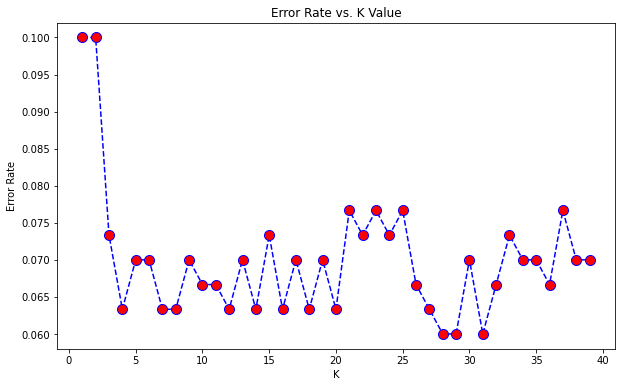

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after aroun K>31 the error rate just tends to hover around 0.06-0.075 Let's retrain the model with that and check the classification report!

In [53]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print(pd.crosstab(y_test,pred,rownames=['Actual'],colnames=['Predicted'],margins=True))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=1


[[130  15]
 [ 15 140]]
Predicted    0    1  All
Actual                  
0          130   15  145
1           15  140  155
All        145  155  300


              precision    recall  f1-score   support

           0       0.90      0.90      0.90       145
           1       0.90      0.90      0.90       155

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

0.9


In [39]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=23


[[132  13]
 [ 10 145]]


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       145
           1       0.92      0.94      0.93       155

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

0.9233333333333333


In [50]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=31)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=23


[[134  11]
 [  7 148]]


              precision    recall  f1-score   support

           0       0.95      0.92      0.94       145
           1       0.93      0.95      0.94       155

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

0.94


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
# Load the Iris dataset (example dataset in scikit-learn)
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable
# print(X)
# print(y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
new_data_point = [[5.1, 3.5, 1.4, 0.2]]  # Replace with your own values
prediction = knn_classifier.predict(new_data_point)
print(f"Predicted Class for the New Data Point: {prediction[0]}")

Accuracy: 1.00
Predicted Class for the New Data Point: 0


In [14]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (categorical)

# Create a DataFrame from the feature values
column_names = [f'feature_{i+1}' for i in range(X.shape[1])]
iris_df = pd.DataFrame(X, columns=column_names)
iris_df['target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier using the training data
knn_classifier.fit(X_train, y_train)

# Example data point for which you want to find the 3 nearest neighbors
new_data_point = [[5.1, 3.5, 1.4, 0.2]]  # Replace with your own values

# Find the indices of the 3 nearest neighbors
distances, indices = knn_classifier.kneighbors(new_data_point)

# Convert the nearest neighbors to a DataFrame
nearest_neighbors_df = iris_df.iloc[indices[0]]
nearest_neighbors_df['distance'] = distances[0] 
# Print the DataFrame with the feature values of the 3 nearest neighbors
print("DataFrame of the 3 Nearest Neighbors:")
print(nearest_neighbors_df)

# Predict the class for the new data point
prediction = knn_classifier.predict(new_data_point)
print(f"Predicted Class for the New Data Point {new_data_point}: {prediction[0]}")


DataFrame of the 3 Nearest Neighbors:
    feature_1  feature_2  feature_3  feature_4  target  distance
23        5.1        3.3        1.7        0.5       0  0.000000
71        6.1        2.8        4.0        1.3       1  0.100000
8         4.4        2.9        1.4        0.2       0  0.141421
Predicted Class for the New Data Point [[5.1, 3.5, 1.4, 0.2]]: 0


C:\Users\HP\AppData\Local\Temp\ipykernel_14552\3236242306.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest_neighbors_df['distance'] = distances[0]


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
import numpy as np

# Load the Boston Housing dataset
boston = load_boston()
X = boston.data  # Features
y = boston.target  # Target variable (continuous)
column_names = [f'feature_{i+1}' for i in range(X.shape[1])]
boston_df = pd.DataFrame(X, columns=column_names)
boston_df['target'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regressor with k=3
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the regressor
knn_regressor.fit(X_train, y_train)

# Example data point for which you want to find the 3 nearest neighbors
new_data_point = np.array([0.00632, 18.0, 2.310, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]).reshape(1, -1)

# Find the indices of the 3 nearest neighbors
distances, indices = knn_regressor.kneighbors(new_data_point)

# Convert the nearest neighbors to a DataFrame
nearest_neighbors_df = boston_df.iloc[indices[0]]
nearest_neighbors_df['distance'] = distances[0]

# Print the DataFrame with the feature values and target values of the 3 nearest neighbors
print("DataFrame of the 3 Nearest Neighbors:")
print(nearest_neighbors_df)

# Predict the target value for the new data point
prediction = knn_regressor.predict(new_data_point)
print(f"Predicted Target Value for the New Data Point {new_data_point}: {prediction[0]:.2f}")


DataFrame of the 3 Nearest Neighbors:
     feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
340    0.06151        0.0       5.19        0.0     0.5150      5.968   
280    0.03578       20.0       3.33        0.0     0.4429      7.820   
147    2.36862        0.0      19.58        0.0     0.8710      4.926   

     feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
340       58.5     4.8122        5.0       224.0        20.2      396.90   
280       64.5     4.6947        5.0       216.0        14.9      387.31   
147       95.7     1.4608        5.0       403.0        14.7      391.71   

     feature_13  target   distance  
340        9.29    18.7  16.097100  
280        3.76    45.4  16.999954  
147       29.53    14.6  18.401002  
Predicted Target Value for the New Data Point [[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]: 22.07


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (categorical)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a weighted KNN classifier with k=3 and distance weights
weighted_knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Train the classifier
weighted_knn_classifier.fit(X_train, y_train)

# Example data point for which you want to find the 3 nearest neighbors
new_data_point = [[5.1, 3.5, 1.4, 0.2]]  # Replace with your own values

# Find the indices of the 3 nearest neighbors
distances, indices = weighted_knn_classifier.kneighbors(new_data_point)
# Calculate the reciprocal of the squared distances (1/distance^2)
reciprocal_distances = 1 / (distances[0] ** 2)

# Convert the nearest neighbors to a DataFrame
nearest_neighbors_df = pd.DataFrame(X[indices[0]], columns=[f'feature_{i+1}' for i in range(X.shape[1])])
nearest_neighbors_df['distance'] = distances[0]
nearest_neighbors_df['reciprocal_distance'] = reciprocal_distances
nearest_neighbors_df['target'] = y[indices[0]]

# Print the DataFrame with the feature values, target values, and distances of the 3 nearest neighbors
print("DataFrame of the 3 Nearest Neighbors:")
print(nearest_neighbors_df)

# Predict the class for the new data point
prediction = weighted_knn_classifier.predict(new_data_point)
print(f"Predicted Class for the New Data Point {new_data_point}: {prediction[0]}")


DataFrame of the 3 Nearest Neighbors:
   feature_1  feature_2  feature_3  feature_4  distance  reciprocal_distance  \
0        5.1        3.3        1.7        0.5  0.000000                  inf   
1        6.1        2.8        4.0        1.3  0.100000                100.0   
2        4.4        2.9        1.4        0.2  0.141421                 50.0   

   target  
0       0  
1       1  
2       0  
Predicted Class for the New Data Point [[5.1, 3.5, 1.4, 0.2]]: 0


C:\Users\HP\AppData\Local\Temp\ipykernel_14552\1865261164.py:27: RuntimeWarning: divide by zero encountered in true_divide
  reciprocal_distances = 1 / (distances[0] ** 2)


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

# Load the Boston Housing dataset
boston = load_boston()
X = boston.data  # Features
y = boston.target  # Target variable (continuous)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a weighted KNN regressor with k=3 and distance weights
weighted_knn_regressor = KNeighborsRegressor(n_neighbors=3, weights='distance')

# Train the regressor
weighted_knn_regressor.fit(X_train, y_train)

# Example data point for which you want to find the 3 nearest neighbors
new_data_point = np.array([0.00632, 18.0, 2.310, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]).reshape(1, -1)

# Find the indices of the 3 nearest neighbors
distances, indices = weighted_knn_regressor.kneighbors(new_data_point)

# Calculate the reciprocal of the squared distances (1/distance^2)
reciprocal_distances = 1 / (distances[0] ** 2)

# Convert the nearest neighbors to a DataFrame
nearest_neighbors_df = pd.DataFrame(X[indices[0]], columns=[f'feature_{i+1}' for i in range(X.shape[1])])
nearest_neighbors_df['distance'] = distances[0]
nearest_neighbors_df['reciprocal_distance'] = reciprocal_distances
nearest_neighbors_df['target'] = y[indices[0]]

# Print the DataFrame with the feature values, target values, distances, and reciprocal distances of the 3 nearest neighbors
print("DataFrame of the 3 Nearest Neighbors:")
print(nearest_neighbors_df)

# Predict the target value for the new data point
prediction = weighted_knn_regressor.predict(new_data_point)
print(f"Predicted Target Value for the New Data Point {new_data_point}: {prediction[0]:.2f}")


DataFrame of the 3 Nearest Neighbors:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    0.06151        0.0       5.19        0.0     0.5150      5.968   
1    0.03578       20.0       3.33        0.0     0.4429      7.820   
2    2.36862        0.0      19.58        0.0     0.8710      4.926   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0       58.5     4.8122        5.0       224.0        20.2      396.90   
1       64.5     4.6947        5.0       216.0        14.9      387.31   
2       95.7     1.4608        5.0       403.0        14.7      391.71   

   feature_13   distance  reciprocal_distance  target  
0        9.29  16.097100             0.003859    18.7  
1        3.76  16.999954             0.003460    45.4  
2       29.53  18.401002             0.002953    14.6  
Predicted Target Value for the New Data Point [[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (categorical)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example values for the number of neighbors
    'weights': ['uniform', 'distance']  # Example values for the weight function
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_knn_classifier = grid_search.best_estimator_
y_pred = best_knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")


Best Hyperparameters: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy on Test Set: 1.00
